In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Import Geely Auto's Data
cars_data = pd.read_csv('CarPrice_Assignment.csv', sep = ',')

In [3]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars_data.shape

(205, 26)

In [5]:
# Data Summary
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
# Data Summary
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Cleaning

In [7]:
# CarName = CarCompany + " " + CarModel
# Keeping just CarCompany in CarName
cars_data['CarName'] = cars_data['CarName'].apply(lambda x : x.split(' ')[0])
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# Observing the Car Companies available in the data
cars_data['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

We can see above that the car names have spelling mistakes, due to which car companies like 'porsche' and 'porcshce' are treated differently. Although, they signify the same car company name. <br/>
Also, the names like 'Nissan' and 'nissan' need to be looked into by taking a common case of alphabets.

In [9]:
# Defining a common case for CarName
cars_data.CarName = cars_data.CarName.str.upper()

# Correcting Spelling Mistakes in CarName
cars_data.CarName.replace('MAXDA','MAZDA',inplace=True)
cars_data.CarName.replace('PORCSHCE','PORSCHE',inplace=True)
cars_data.CarName.replace('TOYOUTA','TOYOTA',inplace=True)
cars_data.CarName.replace('VOKSWAGEN','VOLKSWAGEN',inplace=True)
cars_data.CarName.replace('VW','VOLKSWAGEN',inplace=True)
cars_data['CarName'].unique()


array(['ALFA-ROMERO', 'AUDI', 'BMW', 'CHEVROLET', 'DODGE', 'HONDA',
       'ISUZU', 'JAGUAR', 'MAZDA', 'BUICK', 'MERCURY', 'MITSUBISHI',
       'NISSAN', 'PEUGEOT', 'PLYMOUTH', 'PORSCHE', 'RENAULT', 'SAAB',
       'SUBARU', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

### Univariate Analysis

#### Categorical Variables 

Categorical varibles in cars_data: <br/>
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

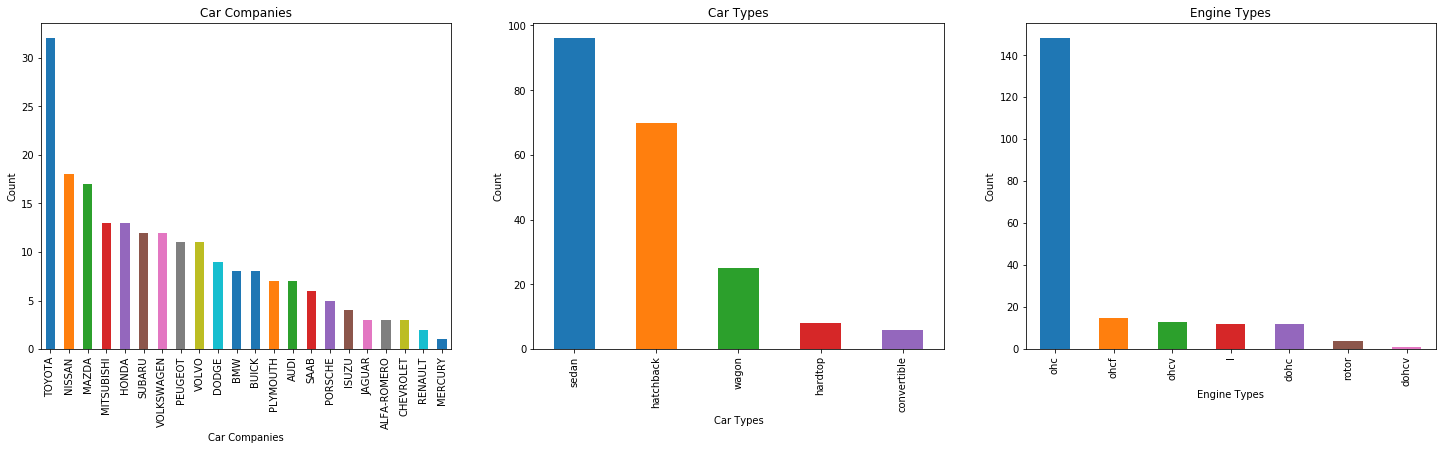

In [10]:
# Plotting categorical variables in sub-plots
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars_data.CarName.value_counts().plot('bar')
plt.title('Car Companies')
plt1.set(xlabel = 'Car Companies', ylabel='Count')

plt.subplot(1,3,2)
plt1 = cars_data.carbody.value_counts().plot('bar')
plt.title('Car Types')
plt1.set(xlabel = 'Car Types', ylabel='Count')

plt.subplot(1,3,3)
plt1 = cars_data.enginetype.value_counts().plot('bar')
plt.title('Engine Types')
plt1.set(xlabel = 'Engine Types', ylabel='Count')

plt.show()

#### Inference

- Toyota is the most favoured car company
- Sedan and hatchback are the most preferred car types 
- ohc is the most dominant and preferred engine type by car companies

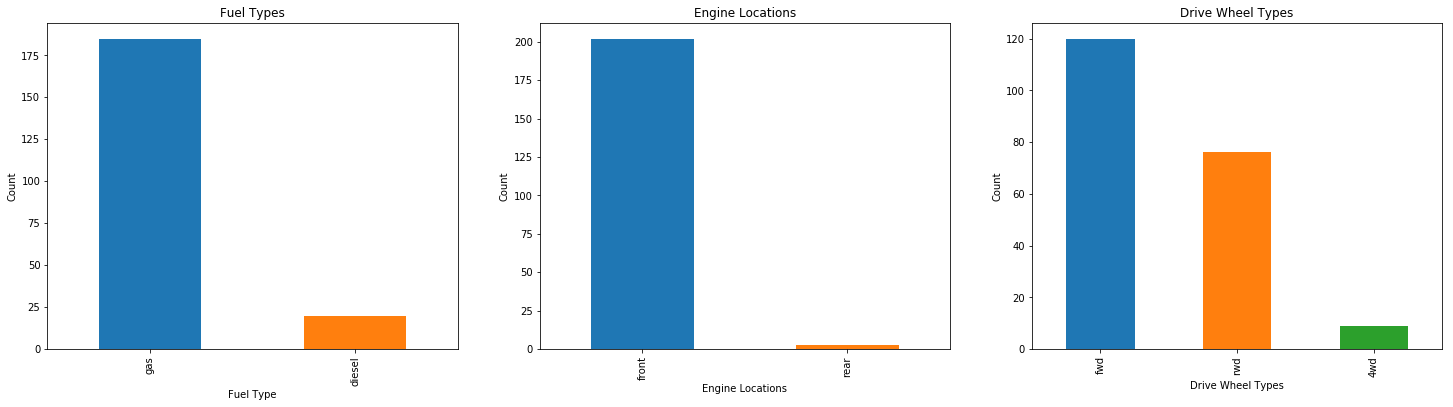

In [11]:
# Plotting categorical variables in sub-plots
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
plt1 = cars_data.fueltype.value_counts().plot('bar')
plt.title('Fuel Types')
plt1.set(xlabel = 'Fuel Type', ylabel='Count')

plt.subplot(1,3,2)
plt1 = cars_data.enginelocation.value_counts().plot('bar')
plt.title('Engine Locations')
plt1.set(xlabel = 'Engine Locations', ylabel='Count')

plt.subplot(1,3,3)
plt1 = cars_data.drivewheel.value_counts().plot('bar')
plt.title('Drive Wheel Types')
plt1.set(xlabel = 'Drive Wheel Types', ylabel='Count')

plt.show()

#### Inference

- Nearly 75% of the cars in the data run on gas as their fuel type
- Nearly all cars in the data (more than 95%) have engines in the front
- Front Wheel Drive is the most preferred among fwd, rwd, 4wd

#### Numeric Variables

Numeric Variables in cars_data: <br/>
- price
- symboling	
- wheelbase	
- carlength	
- carwidth	
- carheight	
- curbweight	
- enginesize	
- boreratio	
- stroke	
- compressionratio	
- horsepower	
- peakrpm	
- citympg	
- highwaympg	

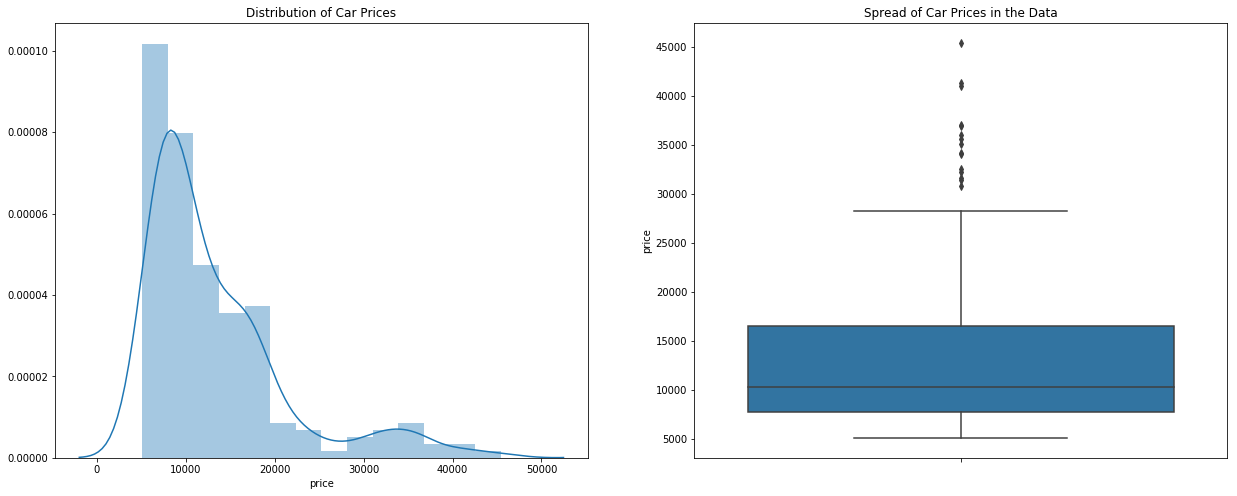

In [12]:
# Car Prices
plt.figure(figsize=(21,8))

# Plotting and observing distribution of car prices
plt.subplot(1,2,1)
plt.title('Distribution of Car Prices')
sns.distplot(cars_data.price)

plt.subplot(1,2,2)
plt.title('Spread of Car Prices in the Data')
sns.boxplot(y=cars_data.price)

plt.show()

In [13]:
# Summary of Prices in the Data 
cars_data.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

#### Inference 

- The data is right-skewed where most of its points are below 13,000, here mean is 13,276.72
- The data points indicate a high-variance in car prices. Most of the car prices are below 75th percentile.

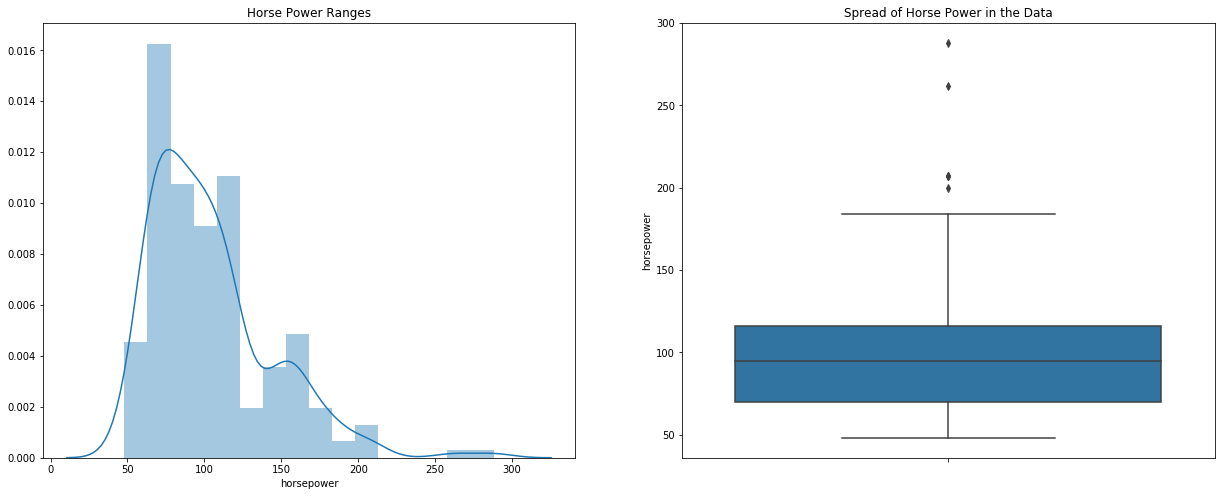

In [14]:
# Horse Power
plt.figure(figsize=(21,8))

# Plotting and observing distribution of horse power of cars
plt.subplot(1,2,1)
plt.title('Horse Power Ranges')
sns.distplot(cars_data.horsepower)

plt.subplot(1,2,2)
plt.title('Spread of Horse Power in the Data')
sns.boxplot(y=cars_data.horsepower)

plt.show()

In [15]:
# Summary of Horse Power of cars in the data
cars_data.horsepower.describe()

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

#### Inference

- Data is right-skewed, with a differnce of ~20 in values of mean and median
- Most values lie between 50 to 200

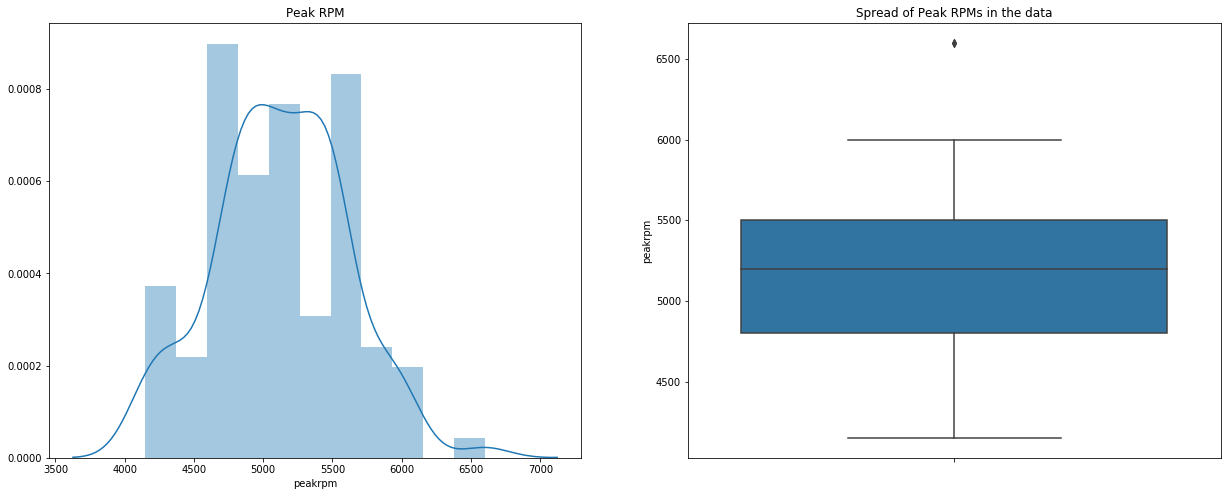

In [16]:
# Peak Rotations per Minute
plt.figure(figsize=(21,8))

# Plotting and observing distribution of car prices
plt.subplot(1,2,1)
plt.title('Peak RPM')
sns.distplot(cars_data.peakrpm)

plt.subplot(1,2,2)
plt.title('Spread of Peak RPMs in the data')
sns.boxplot(y=cars_data.peakrpm)

plt.show()

In [17]:
# Summary of Peak RPMs 
cars_data.peakrpm.describe()

count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64

#### Inference

- Data is slightly skewed. Mean and Median do not differ much from each other

### Bivariate Analysis

Drilling into bivariate analysis of the following combinations: <br/>
- Engine Types vs. Average Price of Cars
- Fuel Type vs. Average Price of Cars
- Aspirations vs. Average Price of Cars
- Engine Location vs. Average Price of Cars
- Number of cylinders vs. Average Price of Cars
- Fuel System vs. Average Price of Cars
- Types of Drive Wheels vs. Average Price of Cars
- Relation between Carlength, Carwidth, Carheight, Curbweight and Average Price of Cars
- Relation of enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, wheelbase, citympg, highwaympg and Average Price of Cars

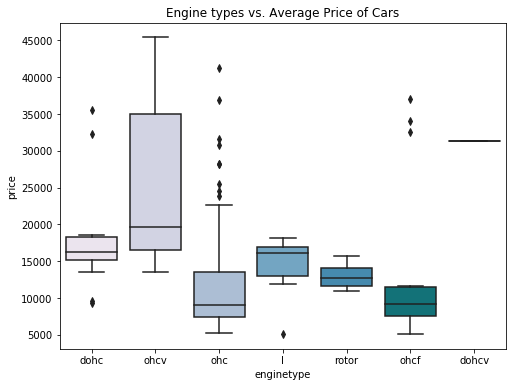

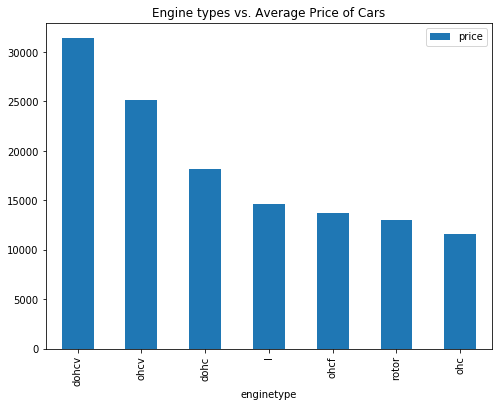

In [18]:
# Relation of Engine Types and Average Price of Cars
plt.figure(figsize=(8,6))

plt.title('Engine types vs. Average Price of Cars')
sns.boxplot(x=cars_data.enginetype, y=cars_data.price, palette=("PuBuGn"))
plt.show()

df = pd.DataFrame(cars_data.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine types vs. Average Price of Cars')
plt.show()

#### Inference

- dohcv and ohcv are the engine types with highest price ranges of cars
- ohcv is the engine types with highest range of car prices

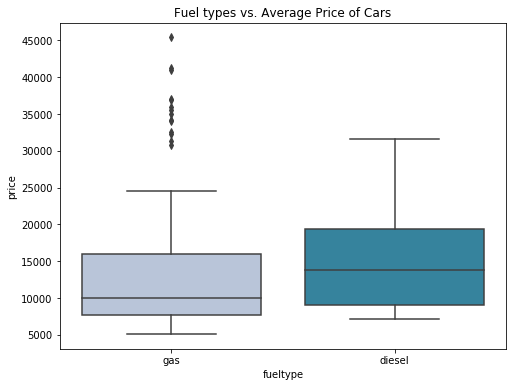

In [19]:
# Relation of Fuel Types and Average Price of Cars
plt.figure(figsize=(8,6))

plt.title('Fuel types vs. Average Price of Cars')
sns.boxplot(x=cars_data.fueltype, y=cars_data.price, palette=("PuBuGn"))
plt.show()

#### Inference

- Diesel fueltype cars have greater average price

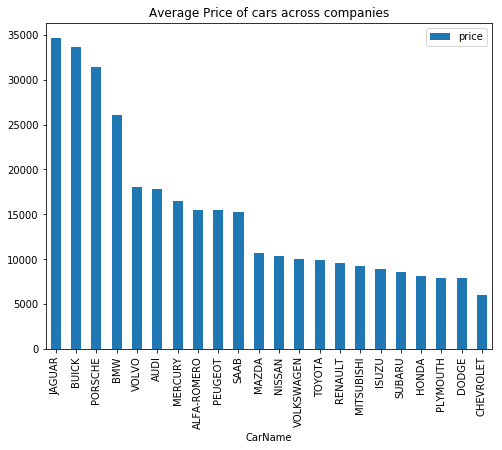

In [20]:
# Relation of Company Names and Average Price of Cars
df = pd.DataFrame(cars_data.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Average Price of cars across companies')
plt.show()

#### Inference

- Jaguar, Buick, Porsche are the top 3 companies considering average prices of cars
- Chevrolet has the lowest value

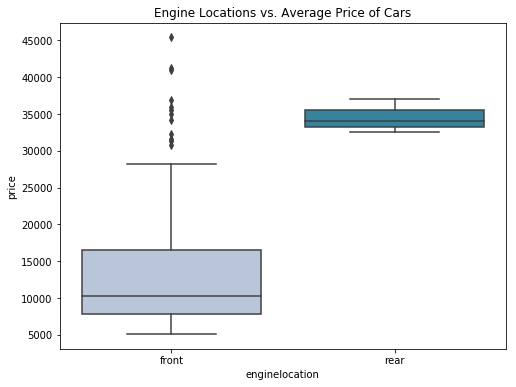

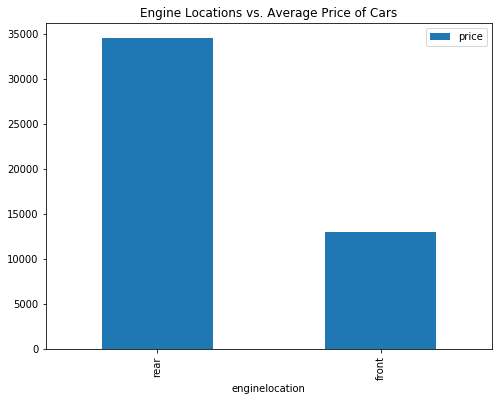

In [21]:
# Relation of Engine Locations and Average Price of Cars
plt.figure(figsize=(8,6))

plt.title('Engine Locations vs. Average Price of Cars')
sns.boxplot(x=cars_data.enginelocation, y=cars_data.price, palette=("PuBuGn"))
plt.show()

df = pd.DataFrame(cars_data.groupby(['enginelocation'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Locations vs. Average Price of Cars')
plt.show()

#### Inference

- Cars with engines on their rear side have significantly higher average price
- Also, interesting the average price of cars with rear engines do not differ much

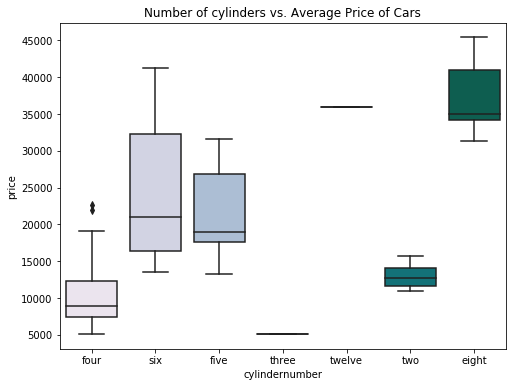

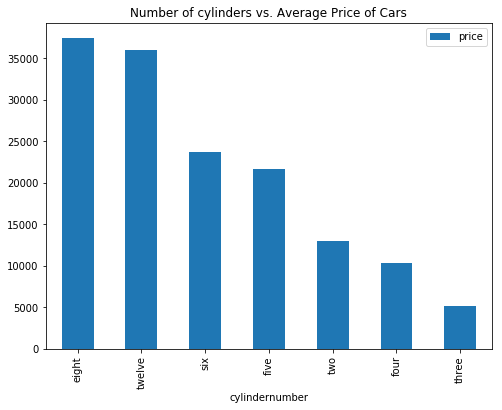

In [22]:
# Relation of Number of Cylinders and Average Price of Cars
plt.figure(figsize=(8,6))

plt.title('Number of cylinders vs. Average Price of Cars')
sns.boxplot(x=cars_data.cylindernumber, y=cars_data.price, palette=("PuBuGn"))
plt.show()

df = pd.DataFrame(cars_data.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Number of cylinders vs. Average Price of Cars')
plt.show()

#### Inference

- Cars with eight and twelve number of cylinders have significantly higher prices
- Cars with six number of cylinders have greater price ranges for customers to buy cars

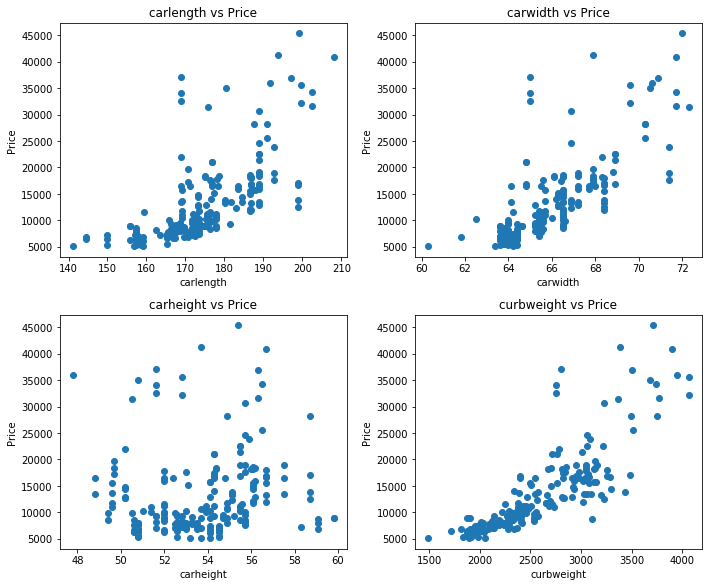

In [23]:
# Relation between Carlength, Carwidth, Carheight, Curbweight and Average Price of Cars
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars_data[x],cars_data['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### Inference

- carwidth, curbweight and carlength have a positive correlation with Price of cars
- On the other hand, carheight seems to show no relation with price of cars

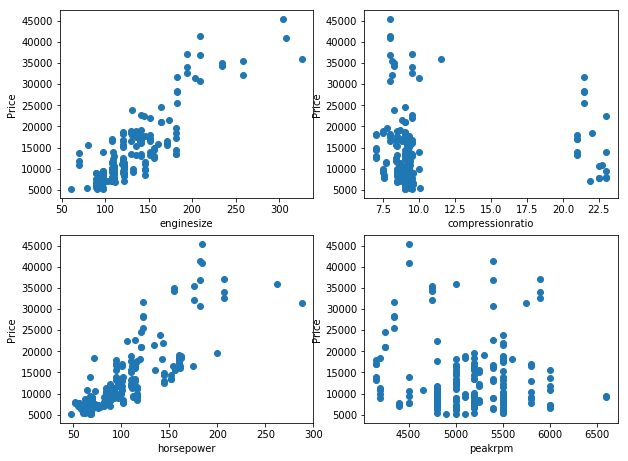

In [24]:
# Relation between enginesize, compressionratio, horsepower, peakrpm and Average Price of Cars
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars_data[x],cars_data['price'])
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('enginesize', 1)
scatter('compressionratio', 2)
scatter('horsepower', 3)
scatter('peakrpm', 4)

#### Inference

- Engine Size and Horse Power have a positive relation with prices of cars
- Compression Ratio and Peak RPM have no relation with the prices of cars

### Data Preparation

List of relevant predictor from the data: <br/>
- Car Range 
- Engine Type 
- Fuel type 
- Car Body 
- Aspiration 
- Cylinder Number 
- Drivewheel 
- Curbweight 
- Car Length
- Car width
- Engine Size 
- Boreratio 
- Horse Power 
- Wheel base 
- Fuel Economy

In [25]:
# Only keeping the above relevant columns in the data
cars_dataset = cars_data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
cars_dataset.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


### Dummy Variables

In [26]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_dataset = dummies('fueltype',cars_dataset)
cars_dataset = dummies('aspiration',cars_dataset)
cars_dataset = dummies('carbody',cars_dataset)
cars_dataset = dummies('drivewheel',cars_dataset)
cars_dataset = dummies('enginetype',cars_dataset)
cars_dataset = dummies('cylindernumber',cars_dataset)

In [27]:
cars_dataset.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


In [28]:
cars_dataset.shape

(205, 28)

### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

### Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
predictors = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[predictors] = scaler.fit_transform(df_train[predictors])

In [31]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000
mean,0.211153,0.404605,0.398579,0.236493,0.489983,0.221037,0.519899,0.454726,0.896341,0.170732,...,0.719512,0.079268,0.054878,0.02439,0.060976,0.762195,0.121951,0.006098,0.006098,0.02439
std,0.212491,0.197731,0.202330,0.148945,0.203913,0.164011,0.197651,0.179980,0.305751,0.377427,...,0.450613,0.270984,0.228440,0.15473,0.240018,0.427043,0.328232,0.078087,0.078087,0.15473
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.070475,0.272414,0.247673,0.135849,0.293651,0.090625,0.409756,0.308333,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
50%,0.132856,0.341379,0.347944,0.184906,0.468254,0.183333,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
75%,0.295349,0.475862,0.522789,0.287736,0.682540,0.283333,0.615041,0.516667,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [32]:
df_train.shape

(164, 28)

In [33]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
3,0.243998,0.455172,0.329325,0.181132,0.404762,0.225000,0.577236,0.491667,1,0,...,1,0,0,0,0,1,0,0,0,0
157,0.057463,0.313793,0.240884,0.139623,0.404762,0.091667,0.409756,0.341667,1,0,...,1,0,0,0,0,1,0,0,0,0
81,0.093406,0.334483,0.325834,0.230189,0.531746,0.166667,0.518699,0.425000,1,0,...,1,0,0,0,0,1,0,0,0,0
32,0.007763,0.244828,0.135376,0.067925,0.182540,0.050000,0.144715,0.308333,1,0,...,1,0,0,0,0,1,0,0,0,0
99,0.105838,0.365517,0.324282,0.222642,0.515873,0.204167,0.525203,0.408333,1,0,...,1,0,0,0,0,1,0,0,0,0


### Correlation between the Predictors

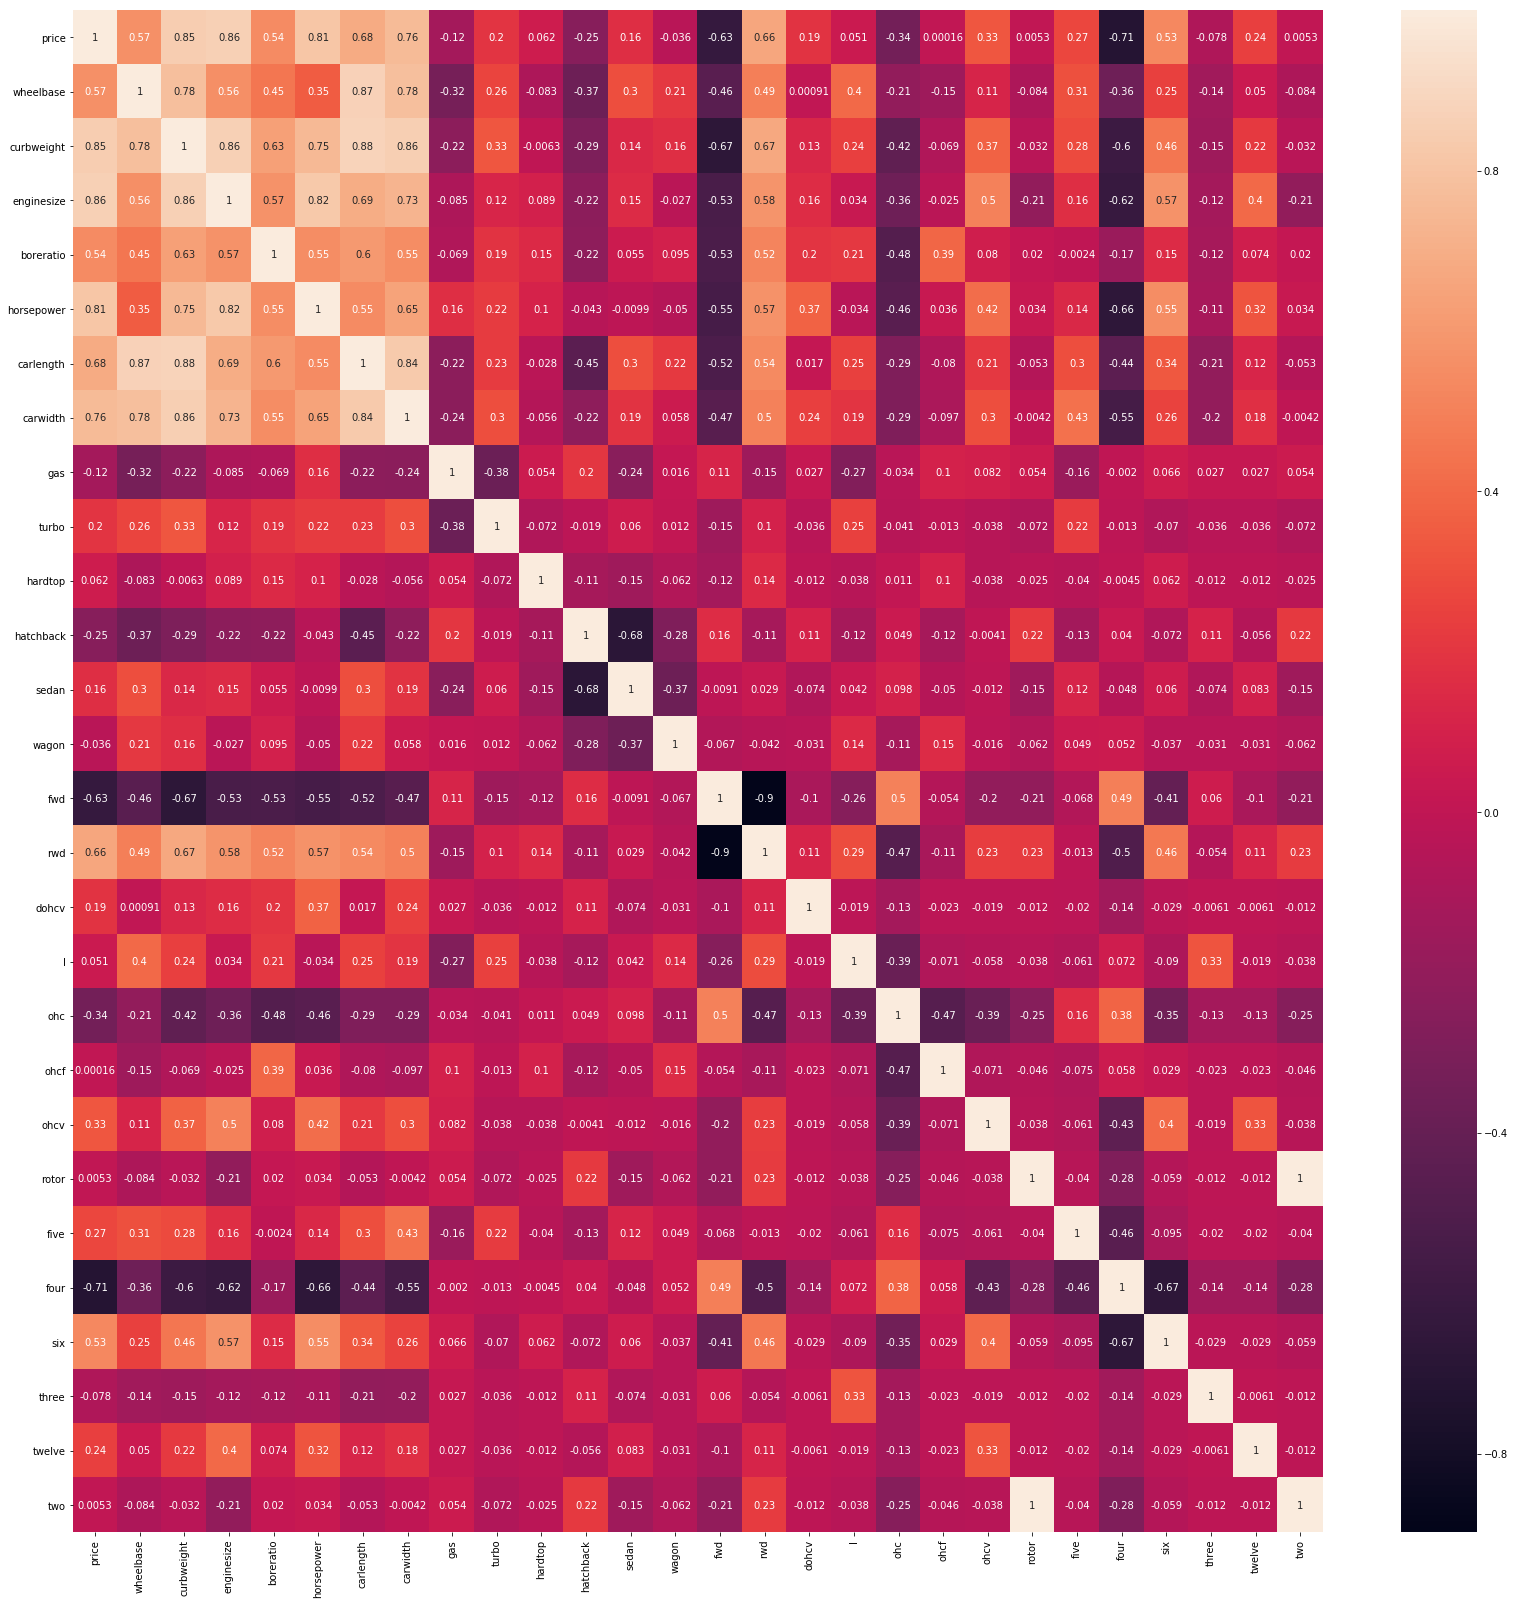

In [34]:
plt.figure(figsize = (28,28))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

#### Inference

- Positively correlated Variables - curbweight, enginesize, horsepower,carwidth and highend
- Negatively correlated variables - hatchback and sedan, fwd and rwd, price an fwd, price and four - number of cylinders

### Model Building

In [35]:
# Splitting the train data into variable X and y
y_train = df_train.pop('price')
X_train = df_train

# Defining the model
lm = LinearRegression()
lm.fit(X_train,y_train)
# Recursive Feature Elimination
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [36]:
# Getting a list of predictors with their respective importance rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('horsepower', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('gas', False, 16),
 ('turbo', False, 17),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 10),
 ('dohcv', False, 3),
 ('l', False, 11),
 ('ohc', False, 5),
 ('ohcf', False, 6),
 ('ohcv', True, 1),
 ('rotor', False, 13),
 ('five', False, 4),
 ('four', False, 2),
 ('six', False, 8),
 ('three', False, 15),
 ('twelve', False, 7),
 ('two', False, 14)]

In [37]:
# Columns with RFE.support_ TRUE
X_train = X_train[X_train.columns[rfe.support_]]
X_train.head()

,curbweight,enginesize,horsepower,carlength,carwidth,hardtop,hatchback,sedan,wagon,ohcv
3,0.329325,0.181132,0.225000,0.577236,0.491667,0,0,1,0,0
157,0.240884,0.139623,0.091667,0.409756,0.341667,0,1,0,0,0
81,0.325834,0.230189,0.166667,0.518699,0.425000,0,1,0,0,0
32,0.135376,0.067925,0.050000,0.144715,0.308333,0,1,0,0,0
99,0.324282,0.222642,0.204167,0.525203,0.408333,0,1,0,0,0


In [38]:
# Building the model using statsmodels
def model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [39]:
# Model 1
X_train_model1 = model(X_train,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.79
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           3.35e-57
Time:                        21:23:52   Log-Likelihood:                 175.82
No. Observations:                 164   AIC:                            -329.6
Df Residuals:                     153   BIC:                            -295.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.043      0.101      0.9

Here, the p-value of carlength is greater than significance value of 0.05 and hence it makes sense to drop this variable.

In [40]:
X_train_model2 = X_train_model1.drop(["carlength"], axis = 1)

In [41]:
# Model 2
X_train_model2 = model(X_train_model2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     92.28
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.94e-57
Time:                        21:23:52   Log-Likelihood:                 173.93
No. Observations:                 164   AIC:                            -327.9
Df Residuals:                     154   BIC:                            -296.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0043      0.043     -0.100      0.9

In [42]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_model2)

,Features,VIF
0,const,40.53
7,sedan,9.40
1,curbweight,8.80
6,hatchback,8.69
2,enginesize,6.80
8,wagon,5.23
4,carwidth,4.16
3,horsepower,3.58
5,hardtop,1.79
9,ohcv,1.39


Dropping sedan because of its high VIF value, which signifies its high multi-collinearity with other variables

In [43]:
X_train_model3 = X_train_model2.drop(["sedan"], axis = 1)

In [44]:
# Model 3
X_train_model3 = model(X_train_model3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     95.77
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           5.03e-56
Time:                        21:23:52   Log-Likelihood:                 167.95
No. Observations:                 164   AIC:                            -317.9
Df Residuals:                     155   BIC:                            -290.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1305      0.023     -5.748      0.0

Dropping hardtop due to its high p-value

In [45]:
X_train_model4 = X_train_model3.drop(["hardtop"], axis = 1)

In [46]:
# Model 4
X_train_model4 = model(X_train_model4,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     110.1
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           4.87e-57
Time:                        21:23:53   Log-Likelihood:                 167.89
No. Observations:                 164   AIC:                            -319.8
Df Residuals:                     156   BIC:                            -295.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1318      0.022     -5.916      0.0

In [47]:
# Check VIF
checkVIF(X_train_model4)

,Features,VIF
0,const,10.25
1,curbweight,8.72
2,enginesize,6.68
4,carwidth,3.98
3,horsepower,3.47
7,ohcv,1.37
6,wagon,1.29
5,hatchback,1.28


Dropping curbweight due to its high VIF value, which implies it is multi-collinear with other variables

In [48]:
X_train_model5 = X_train_model4.drop(["curbweight"], axis = 1)

In [49]:
# Model 5
X_train_model5 = model(X_train_model5,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     123.6
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           7.28e-57
Time:                        21:23:53   Log-Likelihood:                 164.87
No. Observations:                 164   AIC:                            -315.7
Df Residuals:                     157   BIC:                            -294.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1343      0.023     -5.943      0.0

Dropping wagon because of its high p-value(>0.05)

In [50]:
X_train_model6 = X_train_model5.drop(["wagon"], axis = 1)

In [51]:
# Model 6
X_train_model6 = model(X_train_model6,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.60e-57
Time:                        21:23:53   Log-Likelihood:                 163.78
No. Observations:                 164   AIC:                            -315.6
Df Residuals:                     158   BIC:                            -297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1409      0.022     -6.340      0.0

In [52]:
# Check VIF
checkVIF(X_train_model6)

,Features,VIF
0,const,9.82
1,enginesize,4.65
2,horsepower,3.40
3,carwidth,2.23
5,ohcv,1.36
4,hatchback,1.16


### Residual Analysis

In [53]:
# Predicting y
lm = sm.OLS(y_train,X_train_model6).fit()
y_train_price = lm.predict(X_train_model6)

Text(0.5,0,'Errors')

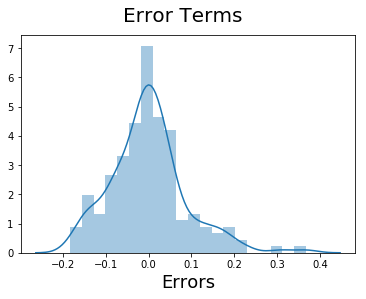

In [54]:
# Plotting histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)   

The error terms seem to be normally distributed. <br/>
Thus, we can conclude that the assumption on linear model is fulfilled

### Model Prediction

In [55]:
# Scaling the test data
predictors = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[predictors] = scaler.fit_transform(df_test[predictors])

In [56]:
# Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [57]:
X_train_model6 = X_train_model6.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_model6.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [58]:
# Making Predictions
y_pred = lm.predict(X_test_new)

In [59]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7395234213346065

### Model Evaluation

Text(0,0.5,'y_pred')

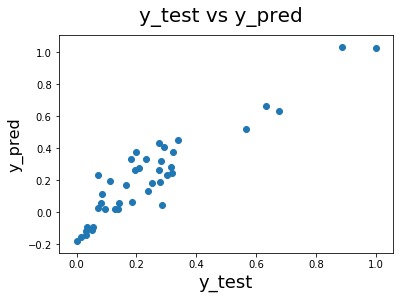

In [60]:
# Plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

In [61]:
# Summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     146.9
Date:                Sun, 25 Aug 2019   Prob (F-statistic):           1.60e-57
Time:                        21:23:56   Log-Likelihood:                 163.78
No. Observations:                 164   AIC:                            -315.6
Df Residuals:                     158   BIC:                            -297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1409      0.022     -6.340      0.000      -0.185      -0.097
enginesize     0.6666      0.103      6.476      0.000       0.463       0.870
horsepower     0.4178      0.080      5.225      0.000       0.260       0.576
carwidth       0.2648      0.059      4.491      0.000       0.148       0.381
hatchback     -0.0382      0.016     -2.372      0.019      -0.070      -0.006
ohcv          -0.0982      0.036     -2.705      0.008      -0.170      -0.026
==============================================================================
Omnibus:                       24.782   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.593
Skew:                           0.787   Prob(JB):                     2.53e-09
Kurtosis:                       4.822   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""